## All the imports

In [1]:
import warnings
warnings.filterwarnings("ignore")
import dask 
import numpy as np
import xarray as xr
import time
import numpy.ma as ma
import matplotlib.cm as mplcm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import os 
import time 
import glob

import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib
matplotlib.rcParams['figure.figsize']= (20, 8)
matplotlib.rcParams['xtick.labelsize']= 22
matplotlib.rcParams['ytick.labelsize']= 22
matplotlib.rcParams['axes.labelsize']= 22
matplotlib.rcParams.update({'font.size': 22})

import zarr
from intake import open_catalog

%matplotlib inline


## Load the data from the catalog

In [2]:
# AVISO data

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds  = cat["sea_surface_height"].to_dask()
ds

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 8901)
Coordinates:
    crs        int32 ...
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(5, 720, 2), meta=np.ndarray>
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
    lon_bnds   (longitude, nv) float32 dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2014-02-26T16:09:13Z
    date_issued:                     2014-01-06T00:00:00Z
    date_modified:                   2015-11-10T19:42:51Z
    geospatial_lat_max:              89.875
    geospatial_lat_min:              -89.875
    geospatial_lat_resolution:       0.25
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              359.875
    geospatial_lon_min:              0.125
    geospatial_lon_resolution:       0.25
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2014-02-26T16:09:13Z: created by DUACS D...
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        ERS-1, Topex/Poseidon
    processing_level:                L4
    product_version:                 5.0
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    source:                          Altimetry measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

In [3]:
# eNATL60 ssh

cat2 = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/MEOM-NEMO.yaml")
ds2  = cat2["eNATL60_BLBT02_SSH"].to_dask()
ds2

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, time_counter: 11688, x: 8354, y: 4729)
Coordinates:
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(240,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2010-01-19T00:30:00 ... 2009-09-17T23:30:00
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    nav_lat               (y, x) float32 dask.array<chunksize=(240, 480), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(240, 480), meta=np.ndarray>
    sossheig              (time_counter, y, x) float32 dask.array<chunksize=(240, 240, 480), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(240, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(240, 2), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    TimeStamp:    24/03/2019 14:43:29 +0100
    description:  ocean T grid variables
    file_name:    eNATL60-BLBT02X_1h_20100101_20100125_gridT-2D_20100119-2010...
    ibegin:       0
    jbegin:       0
    name:         /scratch/tmp/5251284/eNATL60-BLBT02X_1h_20100101_20100125_g...
    ni:           8354
    nj:           10
    timeStamp:    2019-Mar-24 06:31:35 GMT
    title:        ocean T grid variables
    uuid:         80877374-74d2-468e-9fc6-d8cae8009094

In [4]:
# eNATL60 grid

catg = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/MEOM-NEMO.yaml")
dsg  = catg["eNATL60_grid"].to_dask()
dsg

<xarray.Dataset>
Dimensions:       (t: 1, x: 8354, y: 4729, z: 300)
Dimensions without coordinates: t, x, y, z
Data variables:
    e1f           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1t           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1u           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1v           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2f           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2t           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2u           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2v           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e3t_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3t_1d        (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    e3u_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3v_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3w_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3w_1d        (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ff            (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    fmask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    fmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gdept_0       (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdept_1d      (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    gdepu         (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdepv         (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdepw_0       (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdepw_1d      (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    glamf         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamt         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamu         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamv         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphif         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphit         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphiu         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphiv         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    isfdraft      (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    mbathy        (t, y, x) int16 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    misf          (t, y, x) int16 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    nav_lev       (z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    time_counter  (t) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    tmask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    tmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    umask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    umaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    vmask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    vma

## Request ressources

In [5]:
from dask.distributed import Client
from dask_gateway import Gateway

gateway = Gateway()
cluster = gateway.new_cluster()
cluster.scale(50)
cluster

In [6]:
client = Client(cluster)
client

Client Scheduler: gateway://traefik-prod-dask-gateway.prod:80/prod.2480d3c8cdac479bb7516969d8154ddb Dashboard: https://hub.binder.pangeo.io/services/dask-gateway/clusters/prod.2480d3c8cdac479bb7516969d8154ddb/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


-> click on the link to see the dask workers in action, or copy it and paste it in the dask menu on the left

## Region and dates selection

In [11]:
#Definition of the Gulf Stream region

box=(-90,-60,30,45)


In [12]:
#Selection of Gulf Stream region and period of simulation in AVISO data

lonAVISO=ds.longitude.values
where180=np.where(lonAVISO>180)
lonAVISO[where180]=lonAVISO[where180]-360
domainAVISOlon=(box[0]<lonAVISO)*(lonAVISO<box[1])
domainAVISOlat=(box[2]<ds.latitude.values)*(ds.latitude.values<box[3])
whereAVISOlon=np.where(domainAVISOlon)
whereAVISOlat=np.where(domainAVISOlat)

jminAVISO = whereAVISOlat[0][0]
jmaxAVISO = whereAVISOlat[0][-1]
iminAVISO = whereAVISOlon[0][0]
imaxAVISO = whereAVISOlon[0][-1]

aviso_year = ds.sel(time=slice('2009-06-30','2010-10-29'))
myadt = aviso_year.adt[:,jminAVISO:jmaxAVISO+1,iminAVISO:imaxAVISO+1]
lonAVISO_GS=lonAVISO[iminAVISO:imaxAVISO+1]
latAVISO_GS=ds.latitude.values[jminAVISO:jmaxAVISO+1]

In [13]:
domaineNATL60=(box[0]<dsg.nav_lon)*(dsg.nav_lon<box[1])*(box[2]<dsg.nav_lat)*(dsg.nav_lat<box[3])
whereeNATL60=np.where(domaineNATL60)
jmineNATL60 = whereeNATL60[0].min()
jmaxeNATL60 = whereeNATL60[0].max()
imineNATL60 = whereeNATL60[1].min()
imaxeNATL60 = whereeNATL60[1].max()

ds_sorted=ds2.sortby('time_counter')
ssh_eNATL60=ds_sorted.sossheig
ssh_eNATL60_GS=ssh_eNATL60[:,jmineNATL60:jmaxeNATL60+1,imineNATL60:imaxeNATL60+1]
ssh_eNATL60_1d_2009=ssh_eNATL60.sel(time_counter=slice('2009-06-30','2009-12-31')).groupby('time_counter.dayofyear').mean(dim='time_counter')
ssh_eNATL60_1d_2010=ssh_eNATL60.sel(time_counter=slice('2010-01-01','2010-10-29')).groupby('time_counter.dayofyear').mean(dim='time_counter')
ssh_eNATL60_1d=xr.concat([ssh_eNATL60_1d_2009,ssh_eNATL60_1d_2010],dim='dayofyear')
ssh_eNATL60_1d_GS=ssh_eNATL60_1d[:,jmineNATL60:jmaxeNATL60+1,imineNATL60:imaxeNATL60+1]

loneNATL60_GS=dsg.nav_lon[jmineNATL60:jmaxeNATL60+1,imineNATL60:imaxeNATL60+1]
lateNATL60_GS=dsg.nav_lat[jmineNATL60:jmaxeNATL60+1,imineNATL60:imaxeNATL60+1]

In [14]:
print(imineNATL60,imaxeNATL60,jmineNATL60,jmaxeNATL60)

474 2298 1510 2799


## Compute mean and standart deviation 

In [15]:
# Mean and standart deviation of AVISO data

std_ssh_AVISO_GS = myadt.std(dim='time')
mean_ssh_AVISO_GS = myadt.mean(dim='time') - myadt.mean()


In [16]:
# Check chunks for eNATL60 ssh
ssh_eNATL60_1d_GS

,Array,Chunk
Bytes,4.59 GB,460.80 kB
Shape,"(487, 1290, 1825)","(1, 240, 480)"
Count,1252291 Tasks,14610 Chunks
Type,float32,numpy.ndarray


The data is now chunk along the time dimension dayoftheyear, we rechunk so that the computation of mean and std along this dimension is faster (less dask operations)

In [17]:
# Rechunk ssh in GS region
ssh_eNATL60_1d_GS_rechunk=ssh_eNATL60_1d_GS.chunk({'dayofyear':487,'x':100,'y':100})

In [18]:
ssh_eNATL60_1d_GS_rechunk

,Array,Chunk
Bytes,4.59 GB,19.48 MB
Shape,"(487, 1290, 1825)","(487, 100, 100)"
Count,1253426 Tasks,247 Chunks
Type,float32,numpy.ndarray


In [19]:
# Daily average of hourly ssh for eNATL60 outputs

std_ssh_eNATL60_GS=ssh_eNATL60_1d_GS_rechunk.std(dim='dayofyear')
mean_ssh_eNATL60_GS=ssh_eNATL60_1d_GS_rechunk.mean(dim='dayofyear')-ssh_eNATL60_1d_GS_rechunk.mean()

## Check how many operations are needed to compute

In [20]:
std_ssh_AVISO_GS

<xarray.DataArray 'adt' (latitude: 60, longitude: 120)>
dask.array<_sqrt, shape=(60, 120), dtype=float64, chunksize=(60, 120), chunktype=numpy.ndarray>
Coordinates:
    crs        int32 ...
  * latitude   (latitude) float32 30.125 30.375 30.625 ... 44.375 44.625 44.875
  * longitude  (longitude) float32 270.125 270.375 270.625 ... 299.625 299.875

-> 2115 Tasks

In [21]:
mean_ssh_AVISO_GS

<xarray.DataArray 'adt' (latitude: 60, longitude: 120)>
dask.array<sub, shape=(60, 120), dtype=float64, chunksize=(60, 120), chunktype=numpy.ndarray>
Coordinates:
    crs        int32 -2147483647
  * latitude   (latitude) float32 30.125 30.375 30.625 ... 44.375 44.625 44.875
  * longitude  (longitude) float32 270.125 270.375 270.625 ... 299.625 299.875

-> 2317 Tasks

In [22]:
std_ssh_eNATL60_GS

<xarray.DataArray 'sossheig' (y: 1290, x: 1825)>
dask.array<_sqrt, shape=(1290, 1825), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

click on the disk icon to see the chunk and number of tasks -> 1 259 513 Tasks !

In [23]:
mean_ssh_eNATL60_GS

<xarray.DataArray 'sossheig' (y: 1290, x: 1825)>
dask.array<sub, shape=(1290, 1825), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

click on the disk icon to see the chunk and number of tasks -> 1 259 927 Tasks !

## Load the data into memory for easier access

In [24]:
%%time
std_ssh_AVISO_GS.load()

CPU times: user 85.3 ms, sys: 5.18 ms, total: 90.5 ms
Wall time: 4.98 s


<xarray.DataArray 'adt' (latitude: 60, longitude: 120)>
array([[0.08376948, 0.08728729, 0.09101203, ..., 0.08595013, 0.08488176,
        0.08454089],
       [       nan,        nan, 0.08911778, ..., 0.08651437, 0.08178588,
        0.07870229],
       [       nan,        nan,        nan, ..., 0.09406789, 0.0872255 ,
        0.08144338],
       ...,
       [       nan,        nan,        nan, ..., 0.04497165, 0.04476539,
        0.0453099 ],
       [       nan,        nan,        nan, ..., 0.04000485, 0.04128559,
        0.04289714],
       [       nan,        nan,        nan, ..., 0.04064351, 0.0418787 ,
        0.04285547]])
Coordinates:
    crs        int32 -2147483647
  * latitude   (latitude) float32 30.125 30.375 30.625 ... 44.375 44.625 44.875
  * longitude  (longitude) float32 270.125 270.375 270.625 ... 299.625 299.875

In [25]:
%%time
mean_ssh_AVISO_GS.load()

CPU times: user 94 ms, sys: 3.05 ms, total: 97.1 ms
Wall time: 1.88 s


<xarray.DataArray 'adt' (latitude: 60, longitude: 120)>
array([[-0.10581218, -0.10541465, -0.09182656, ...,  0.21396215,
         0.20179377,  0.19264223],
       [        nan,         nan, -0.10638179, ...,  0.21301697,
         0.20148207,  0.1911104 ],
       [        nan,         nan,         nan, ...,  0.20780835,
         0.19833278,  0.18882108],
       ...,
       [        nan,         nan,         nan, ..., -0.41507687,
        -0.42161876, -0.4274282 ],
       [        nan,         nan,         nan, ..., -0.41855613,
        -0.42693046, -0.43321793],
       [        nan,         nan,         nan, ..., -0.41512471,
        -0.4271629 , -0.43725654]])
Coordinates:
    crs        int32 -2147483647
  * latitude   (latitude) float32 30.125 30.375 30.625 ... 44.375 44.625 44.875
  * longitude  (longitude) float32 270.125 270.375 270.625 ... 299.625 299.875

In [26]:
%%time
std_ssh_eNATL60_GS.load()

CPU times: user 15.8 s, sys: 625 ms, total: 16.4 s
Wall time: 48 s


<xarray.DataArray 'sossheig' (y: 1290, x: 1825)>
array([[       nan,        nan,        nan, ..., 0.08533151, 0.0854967 ,
        0.08566845],
       [       nan,        nan,        nan, ..., 0.08489844, 0.08505268,
        0.08521486],
       [       nan,        nan,        nan, ..., 0.08449339, 0.08463687,
        0.08478867],
       ...,
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.10626867, 0.        ,
        0.10622034]], dtype=float32)
Dimensions without coordinates: y, x

In [27]:
%%time
mean_ssh_eNATL60_GS.load()

CPU times: user 14.7 s, sys: 503 ms, total: 15.2 s
Wall time: 44.1 s


<xarray.DataArray 'sossheig' (y: 1290, x: 1825)>
array([[        nan,         nan,         nan, ...,  0.16083162,
         0.16049701,  0.1601867 ],
       [        nan,         nan,         nan, ...,  0.16046166,
         0.16013168,  0.15982586],
       [        nan,         nan,         nan, ...,  0.16008937,
         0.1597645 ,  0.15946136],
       ...,
       [        nan,         nan,         nan, ...,  0.03233671,
         0.03233671,  0.03233671],
       [        nan,         nan,         nan, ...,  0.03233671,
         0.03233671,  0.03233671],
       [        nan,         nan,         nan, ..., -0.3428792 ,
         0.03233671, -0.3434144 ]], dtype=float32)
Dimensions without coordinates: y, x

## Make the plots

In [28]:
def plot(ax,lat,lon,datamesh,datacont,cmap,extent,vmin,vmax,cont,txt):
    ax.set_extent(extent)
    pcolor=ax.pcolormesh(lon,lat,datamesh,transform=ccrs.PlateCarree(),
                         cmap=cmap,vmin=vmin,vmax=vmax)
    contour=ax.contour(lon,lat,datacont,cont,transform=ccrs.PlateCarree(),
                       colors='k',alpha=0.5,linewidth=0.0001,antialiased=True)
    ax.add_feature(cfeature.LAND,facecolor='grey')
    gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, 
                    color='gray', alpha=0.5, linestyle='--')

    fig.subplots_adjust(right=0.8)
    gl.xlocator = mticker.FixedLocator([-80,-85,-70,-65,-60])
    gl.ylocator = mticker.FixedLocator([30,35,40,45,50,55])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'black'}
    gl.ylabel_style = {'size': 15, 'color': 'black'}

    cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.75,label='m')
    ax.text(0.1, 0.7, txt,fontsize=15, color='white', transform=ax.transAxes)


CPU times: user 3.7 s, sys: 533 ms, total: 4.23 s
Wall time: 15.4 s


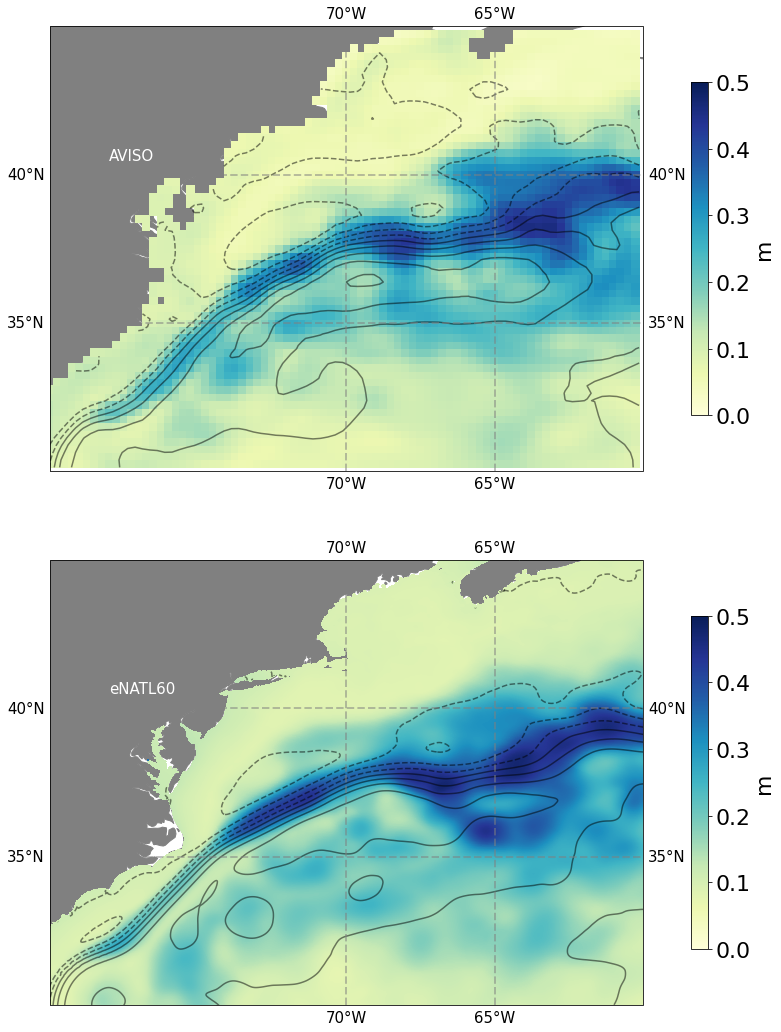

In [29]:
%%time

fig=plt.figure(figsize=(20,18))

ax1 = fig.add_subplot(211,projection=ccrs.PlateCarree())
plot(ax1,latAVISO_GS,lonAVISO_GS,std_ssh_AVISO_GS,mean_ssh_AVISO_GS,mplcm.YlGnBu,
     [-80,-60,30,45],0,0.5,np.arange(-1,1,0.15),'AVISO')

ax2 = fig.add_subplot(212,projection=ccrs.PlateCarree(central_longitude=-30))
mask=np.squeeze(dsg.tmaskutil[0,jmineNATL60:jmaxeNATL60+1,imineNATL60:imaxeNATL60+1])
data_ma_mesh=np.ma.masked_where(1-mask,std_ssh_eNATL60_GS)
data_ma_cont=np.ma.masked_where(1-mask,mean_ssh_eNATL60_GS)
plot(ax2,lateNATL60_GS,loneNATL60_GS,data_ma_mesh,data_ma_cont,mplcm.YlGnBu,
     [-80,-60,30,45],0,0.5,np.arange(-1,1,0.15),'eNATL60')



In [ ]:
cluster.close()
client.close()